In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from fbprophet import Prophet

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only `Date` and `Adj Close` columns

In [7]:
df = wmt[['Date','Adj Close']]
df.head()

,Date,Adj Close
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* rename columns to fit Prophet naming convention

In [8]:
df = df.rename(columns={'Date':'ds', 'Adj Close':'y'})
df.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* convert date to datetime

In [9]:
df.ds = pd.to_datetime(df.ds)

* plot time-series

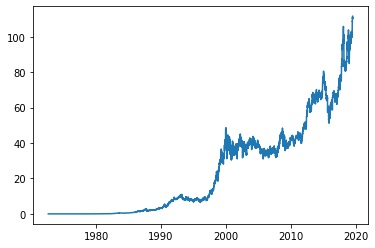

In [11]:
plt.plot(df.ds, df.y)
plt.show()

* instantiate Prophet

In [12]:
m = Prophet()

* fit model

In [13]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values in future 

In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12175,2020-06-27,96.521562,91.718600,101.168190
12176,2020-06-28,96.524347,91.826553,101.473942
12177,2020-06-29,96.511626,91.708452,101.436130
12178,2020-06-30,96.532451,91.482507,101.474169
12179,2020-07-01,96.521861,91.616014,101.292677


* plot forecast

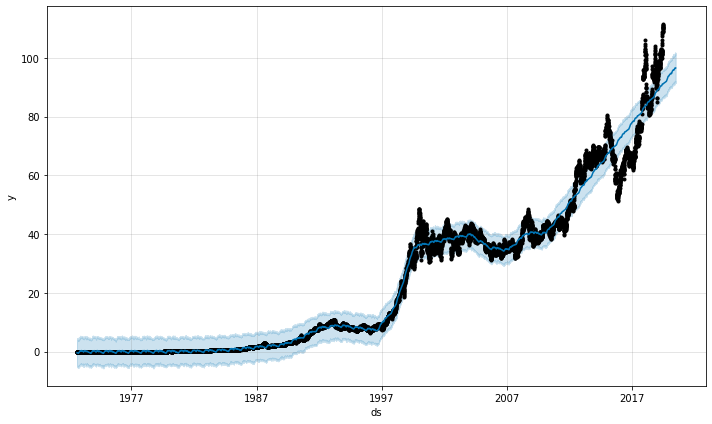

In [15]:
fig1 = m.plot(forecast)

* plot components

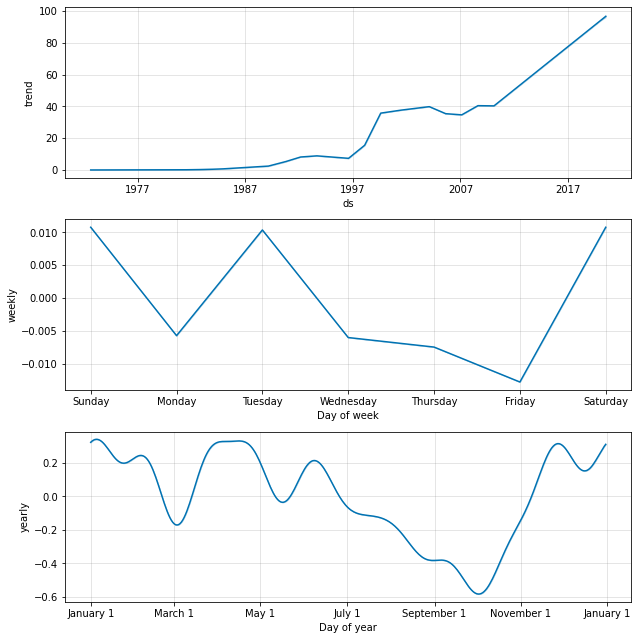

In [16]:
fig2 = m.plot_components(forecast)

- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.